In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Carregado a base de dados

In [125]:
hotel_bookings = pd.read_csv('hotel_bookings.csv')
print(hotel_bookings.shape)

(119390, 32)


### Retirando as linhas com numero de pessoas iguais a 0 uma vez que esses valores não fazem sentido 

In [126]:
hotel_bookings = hotel_bookings.drop(hotel_bookings[(hotel_bookings['adults']==0) & (hotel_bookings['children']==0) & (hotel_bookings['babies']==0)].index)
hotel_bookings.shape

(119210, 32)

### Proporção entre hoteis e resorts

C:\Users\tayco\AppData\Local\Temp\ipykernel_1632\1391123622.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2f}%'.format(x*100) for x in vals])


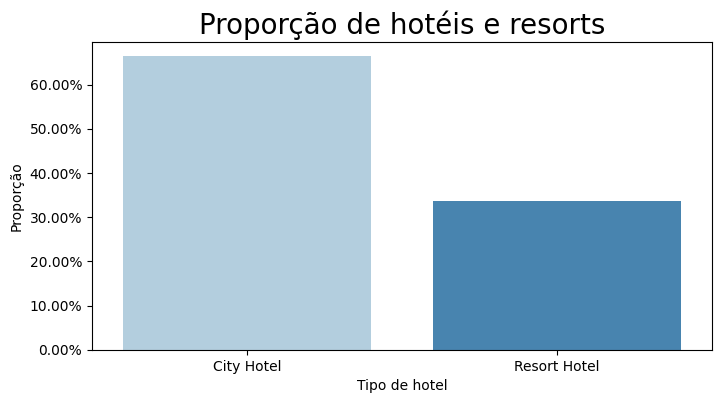

In [127]:
# Contar o número de hotéis e resorts
hotel_counts = hotel_bookings['hotel'].value_counts()
total = hotel_counts.sum()
prop_hotels = hotel_counts['City Hotel'] / total
prop_resorts = hotel_counts['Resort Hotel'] / total

# Criar o gráfico
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=['City Hotel', 'Resort Hotel'], y=[prop_hotels, prop_resorts], palette='Blues')

# Adicionar título e rótulos dos eixos
plt.title('Proporção de hotéis e resorts', size=20)
plt.xlabel('Tipo de hotel')
plt.ylabel('Proporção')

# Formatar o rótulo do eixo y como uma porcentagem
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2f}%'.format(x*100) for x in vals])

# Exibir o gráfico
plt.show()

### Proporção de reservas entre os tipos de hotel

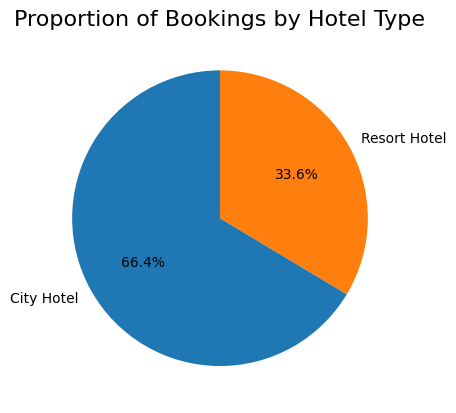

In [128]:
# Count the number of bookings for each hotel type
hotel_types = hotel_bookings['hotel'].value_counts()

# Create a pie chart of the hotel types
fig, ax = plt.subplots()
ax.pie(hotel_types.values, labels=hotel_types.index, autopct='%1.1f%%', startangle=90)

# Set the chart title
ax.set_title('Proportion of Bookings by Hotel Type', fontsize=16)

# Show the chart
plt.show()

### De onde os clientes estão vindo?

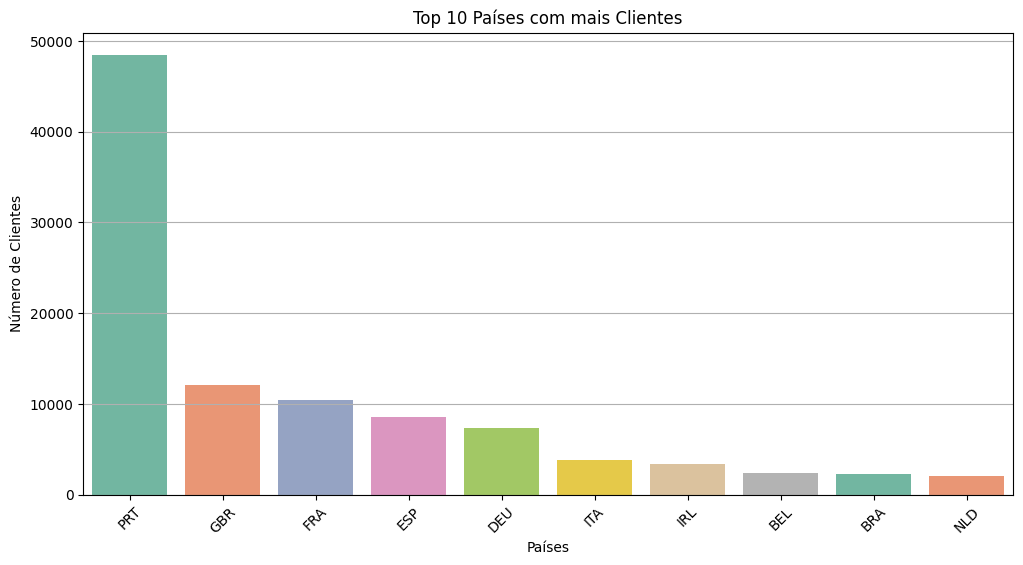

In [129]:
# Contar o número de ocorrências de cada país na coluna "country"
countries = hotel_bookings['country'].value_counts()

# Classificar os países em ordem decrescente
countries = countries.sort_values(ascending=False)

# Imprimir os 10 países com mais clientes
plt.figure(figsize=(12,6))
plt.grid(True)
sns.countplot(x='country', data=hotel_bookings, order=hotel_bookings['country'].value_counts().index[:10], palette='Set2')
plt.title('Top 10 Países com mais Clientes')
plt.xlabel('Países')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.show()


### Número de reservas por mês em cada tipo de hotel

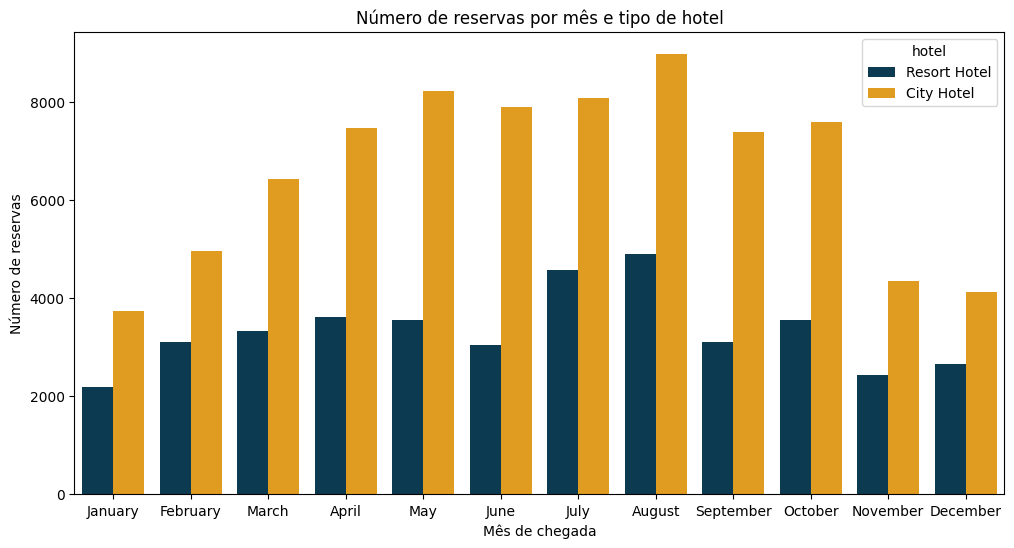

In [130]:
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_date_month', hue='hotel', data=hotel_bookings, palette=['#003f5c', '#ffa600'], order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Número de reservas por mês e tipo de hotel')
plt.xlabel('Mês de chegada')
plt.ylabel('Número de reservas')
plt.show()

### Número de reservas canceladas por mês em cada tipo de hotel

C:\Users\tayco\AppData\Local\Temp\ipykernel_1632\3611209386.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])


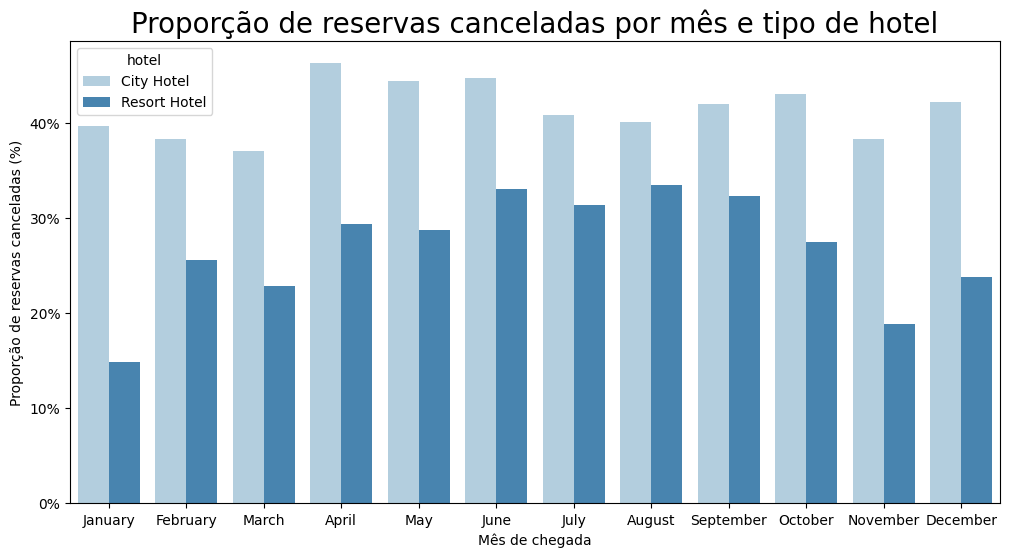

In [131]:
# Calcular a proporção de reservas canceladas por mês e tipo de hotel
prop_cancelled = hotel_bookings.groupby(['arrival_date_month', 'hotel', 'is_canceled']).size().div(len(hotel_bookings)).mul(100).reset_index()
prop_cancelled.rename(columns={0: 'proportion'}, inplace=True)
prop_cancelled = prop_cancelled.pivot_table(values='proportion', index=['arrival_date_month', 'hotel'], columns='is_canceled', aggfunc='sum').reset_index()
prop_cancelled['total'] = prop_cancelled[0] + prop_cancelled[1]
prop_cancelled[0] = prop_cancelled[0] / prop_cancelled['total'] * 100
prop_cancelled[1] = prop_cancelled[1] / prop_cancelled['total'] * 100

# Criar o gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='arrival_date_month', y=1, hue='hotel', data=prop_cancelled, palette='Blues', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Adicionar título e rótulos dos eixos
plt.title('Proporção de reservas canceladas por mês e tipo de hotel', size=20)
plt.xlabel('Mês de chegada')
plt.ylabel('Proporção de reservas canceladas (%)')

# Formatar o rótulo do eixo y como uma porcentagem
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])

# Adicionar anotações no gráfico
total_bookings = len(hotel_bookings)
prop_cancelled = hotel_bookings['is_canceled'].sum() / total_bookings

# Exibir o gráfico
plt.show()

### Número de hóspedes em cada tipo de hotel em cada mês

C:\Users\tayco\AppData\Local\Temp\ipykernel_1632\632561752.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(month_order)


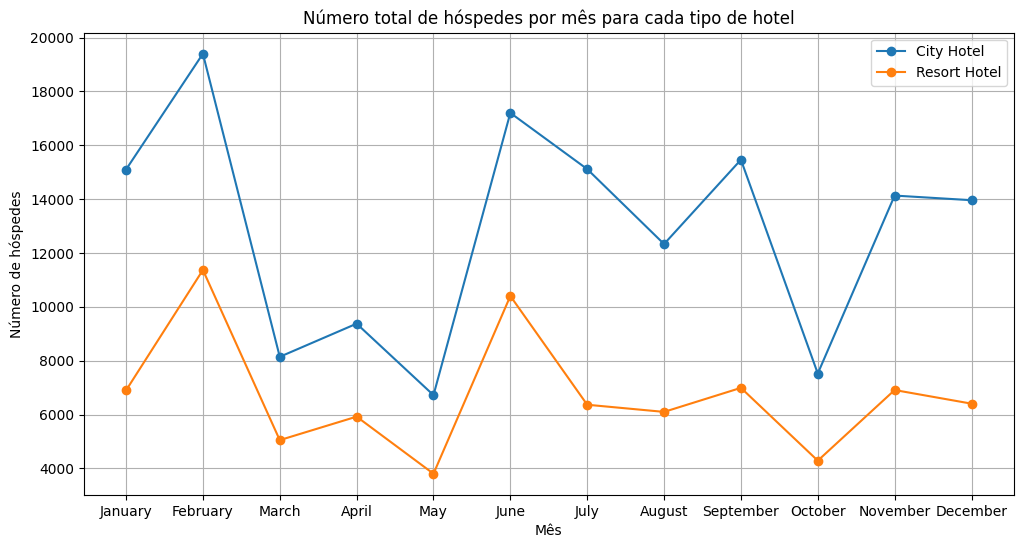

In [132]:
# Group the data by hotel type and arrival month and sum the number of guests
guests_by_hotel_month = hotel_bookings.groupby(['hotel', 'arrival_date_month'])[['adults', 'children', 'babies']].sum()

# Plot a line chart of the number of guests by month for each hotel type
fig, ax = plt.subplots(figsize=(12, 6))
for hotel_type, guests in guests_by_hotel_month.groupby('hotel'):
    ax.plot(guests.index.get_level_values('arrival_date_month'), guests.sum(axis=1), label=hotel_type, marker='o')

# Set the chart title and labels
ax.set_title('Número total de hóspedes por mês para cada tipo de hotel')
ax.set_xlabel('Mês')
ax.set_ylabel('Número de hóspedes')

# Set the order of the months and update the x-axis labels
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax.set_xticklabels(month_order)

# Add gridlines to the chart
ax.grid(True)

# Show the legend and chart
ax.legend()
plt.show()


### Quanto os clientes estão pagando em média pelos quartos ?

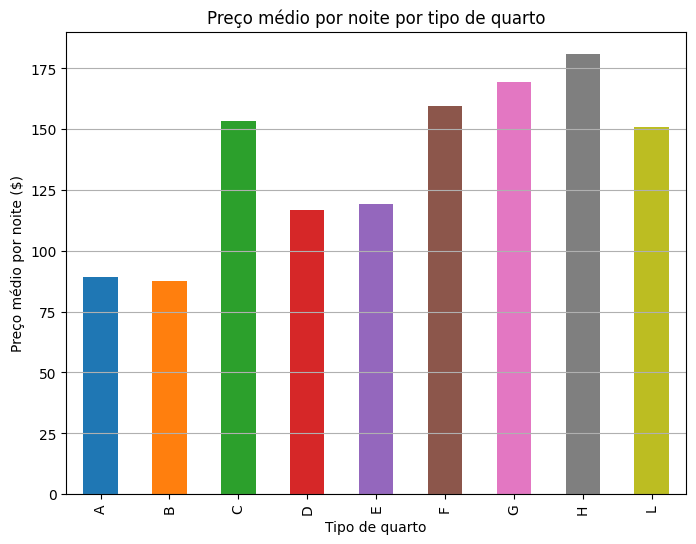

In [133]:
# Filter the data to only include completed bookings
completed_bookings = hotel_bookings[hotel_bookings['is_canceled'] == 0]

# Calculate the average price per night paid by guests for each type of room
avg_price_per_night_by_room_type = completed_bookings.groupby('reserved_room_type')['adr'].mean()

# Define colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a bar chart of the average price per night by room type
fig, ax = plt.subplots(figsize=(8, 6))
avg_price_per_night_by_room_type.plot(kind='bar', ax=ax, color=colors)

# Set the chart title and labels
ax.set_title('Preço médio por noite por tipo de quarto')
ax.set_xlabel('Tipo de quarto')
ax.set_ylabel('Preço médio por noite ($)')

# Add grid to the chart
ax.grid(True, axis='y')

# Show the chart
plt.show()


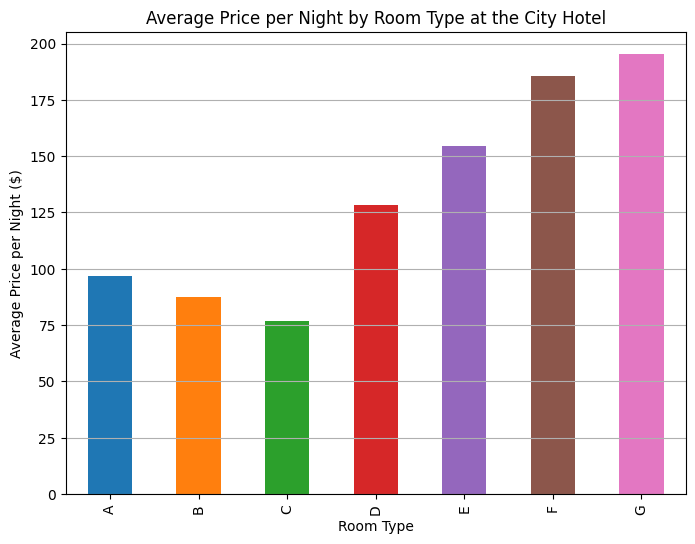

In [138]:
# Filter the data to only include completed bookings at the City Hotel
city_hotel_bookings = hotel_bookings[(hotel_bookings['is_canceled'] == 0) & (hotel_bookings['hotel'] == 'City Hotel')]

# Calculate the average price per night paid by guests for each type of room
avg_price_per_night_by_room_type = city_hotel_bookings.groupby('reserved_room_type')['adr'].mean()

# Define colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a bar chart of the average price per night by room type
fig, ax = plt.subplots(figsize=(8, 6))
avg_price_per_night_by_room_type.plot(kind='bar', ax=ax, color=colors)

# Set the chart title and labels
ax.set_title('Average Price per Night by Room Type at the City Hotel')
ax.set_xlabel('Room Type')
ax.set_ylabel('Average Price per Night ($)')

# Add grid to the chart
ax.grid(True, axis='y')

# Show the chart
plt.show()


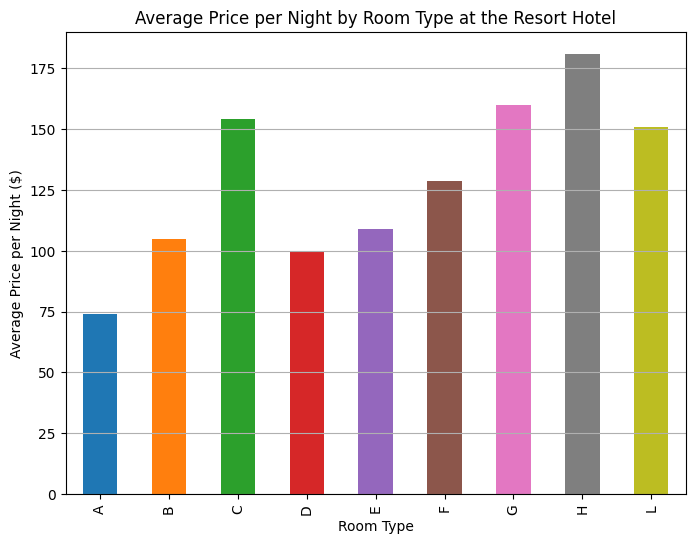

In [139]:
# Filter the data to only include completed bookings at the Resort Hotel
resort_hotel_bookings = hotel_bookings[(hotel_bookings['is_canceled'] == 0) & (hotel_bookings['hotel'] == 'Resort Hotel')]

# Calculate the average price per night paid by guests for each type of room
avg_price_per_night_by_room_type = resort_hotel_bookings.groupby('reserved_room_type')['adr'].mean()

# Define colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a bar chart of the average price per night by room type
fig, ax = plt.subplots(figsize=(8, 6))
avg_price_per_night_by_room_type.plot(kind='bar', ax=ax, color=colors)

# Set the chart title and labels
ax.set_title('Average Price per Night by Room Type at the Resort Hotel')
ax.set_xlabel('Room Type')
ax.set_ylabel('Average Price per Night ($)')

# Add grid to the chart
ax.grid(True, axis='y')

# Show the chart
plt.show()


### Quanto está sendo o ADR médio por cada tipo de hotel

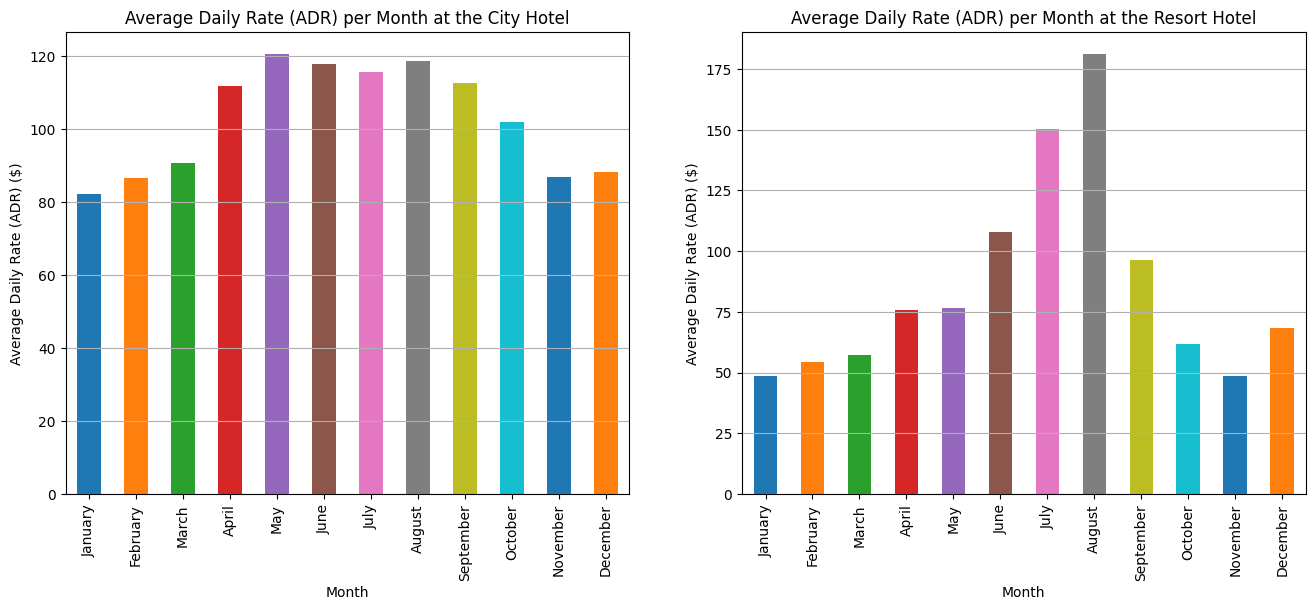

In [134]:
#Filter the data to only include completed bookings at the City Hotel
city_hotel_bookings = hotel_bookings[(hotel_bookings['is_canceled'] == 0) & (hotel_bookings['hotel'] == 'City Hotel')]

#Filter the data to only include completed bookings at the Resort Hotel
resort_hotel_bookings = hotel_bookings[(hotel_bookings['is_canceled'] == 0) & (hotel_bookings['hotel'] == 'Resort Hotel')]

#Group the data by arrival month and calculate the average daily rate (ADR) per month
avg_adr_by_month_city = city_hotel_bookings.groupby('arrival_date_month')['adr'].mean()

#Group the data by arrival month and calculate the average daily rate (ADR) per month
avg_adr_by_month_resort = resort_hotel_bookings.groupby('arrival_date_month')['adr'].mean()

# Define colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

#Define the order of the months for plotting
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


#Create a subplot with two axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

#Plot the first graph on the first axis
avg_adr_by_month_city.loc[month_order].plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('Average Daily Rate (ADR) per Month at the City Hotel')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Daily Rate (ADR) ($)')
ax1.grid(True, axis='y')

#Plot the second graph on the second axis
avg_adr_by_month_resort.loc[month_order].plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Average Daily Rate (ADR) per Month at the Resort Hotel')
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Daily Rate (ADR) ($)')
ax2.grid(True, axis='y')

#Show the subplot
plt.show()


### Os clientes estão recebendo o tipo de quarto que solicitaram?

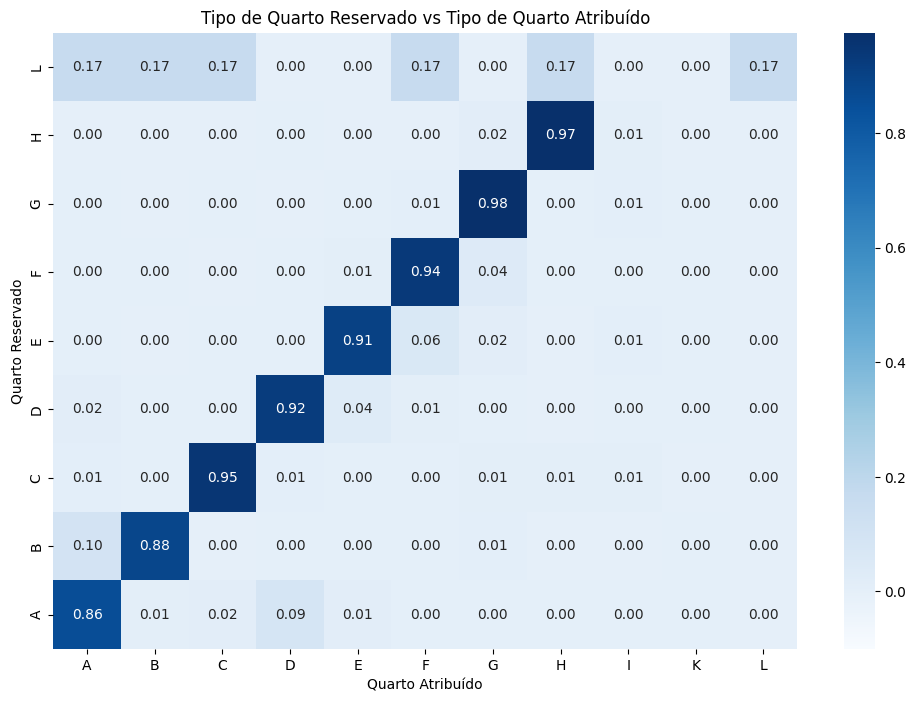

In [145]:
# Gerar a matriz de confusão
confusion_matrix = pd.crosstab(hotel_bookings['reserved_room_type'], hotel_bookings['assigned_room_type'], normalize='index')

# Plotar o gráfico de matriz de confusão com eixo y invertido
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', vmin=confusion_matrix.values.max(), vmax=confusion_matrix.values.min(), fmt=".2f")
plt.title('Tipo de Quarto Reservado vs Tipo de Quarto Atribuído')
plt.xlabel('Quarto Atribuído')
plt.ylabel('Quarto Reservado')
plt.gca().invert_yaxis()
plt.show()

### Quanto o fator anterior afeta no cancelamento 

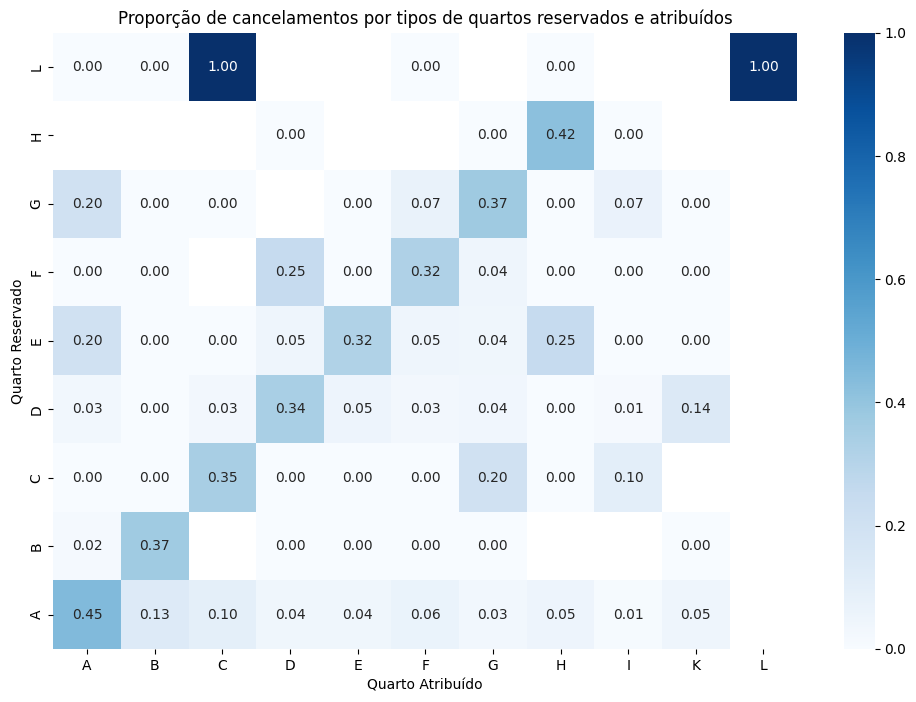

In [136]:
# Calculate the proportion of cancellations for each combination of reserved and assigned room types
confusion_matrix = pd.crosstab(hotel_bookings['reserved_room_type'], hotel_bookings['assigned_room_type'], values=hotel_bookings['is_canceled'], aggfunc='mean')

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix, cmap='Blues', annot=True, fmt=".2f")
plt.title('Proporção de cancelamentos por tipos de quartos reservados e atribuídos')
plt.xlabel('Quarto Atribuído')
plt.ylabel('Quarto Reservado')
plt.gca().invert_yaxis()
plt.show()

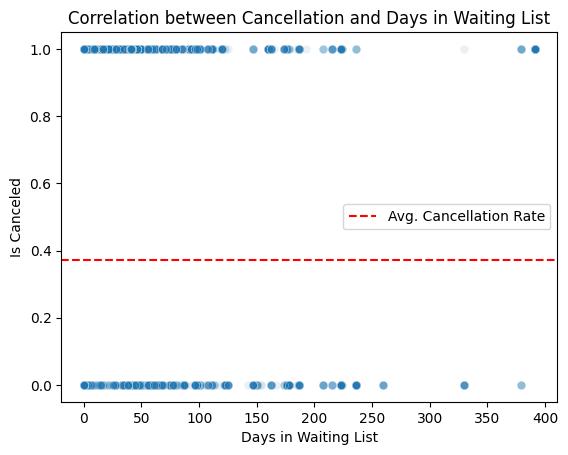

In [150]:
# Create a scatter plot of 'days_in_waiting_list' vs 'is_canceled'
sns.scatterplot(x='days_in_waiting_list', y='is_canceled', data=hotel_bookings, alpha=0.1)

# Calculate the average cancellation rate
avg_cancellation_rate = hotel_bookings['is_canceled'].mean()

# Add a horizontal line to show the average cancellation rate
plt.axhline(y=avg_cancellation_rate, color='r', linestyle='--', label='Avg. Cancellation Rate')

# Set the chart title and labels
plt.title('Correlation between Cancellation and Days in Waiting List')
plt.xlabel('Days in Waiting List')
plt.ylabel('Is Canceled')

# Add legend to the chart
plt.legend()

# Show the chart
plt.show()